# 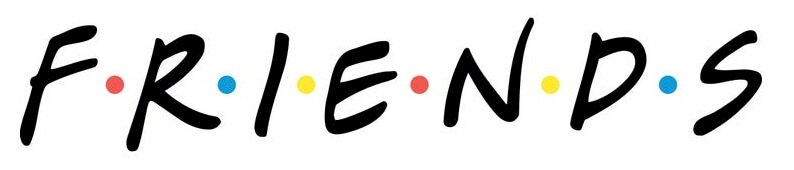

In [201]:
# Libraries I used

import pandas as pd
import numpy as np
import re
import nltk
import spacy
from spacy import displacy
import nltk
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path, getcwd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [202]:
script = open('Friends_Transcript.txt','r').read()

In [203]:
script[:1000]

"THE ONE WHERE MONICA GETS A NEW ROOMATE (THE PILOT-THE UNCUT VERSION)\nWritten by: Marta Kauffman & David Crane\n[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]\nMonica: There's nothing to tell! He's just some guy I work with!\nJoey: C'mon, you're going out with the guy! There's gotta be something wrong with him!\nChandler: All right Joey, be nice. So does he have a hump? A hump and a hairpiece?\nPhoebe: Wait, does he eat chalk?\n(They all stare, bemused.)\nPhoebe: Just, 'cause, I don't want her to go through what I went through with Carl- oh!\nMonica: Okay, everybody relax. This is not even a date. It's just two people going out to dinner and- not having sex.\nChandler: Sounds like a date to me.\n[Time Lapse]\nChandler: Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realize I am totally naked.\nAll: Oh, yeah. Had that dream.\nChandler: Then I look down, and I realize there's a phone... there.\nJoey: Instead of...?\nChandle

In [204]:
# convert all the words into lowercase
# to avoid any duplicates and for better counting overall 

script = script.lower()

In [205]:
stopword = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '',str(text))                    #Punctuations
    text = re.split("\W+",text)                                #Tokenizing
    text = [word for word in text if word not in stopword]     #Stop words
    text = ' '.join(text)                              
    return text


def frequent(string):
    clean_string = clean_text(string)
    split_string = pd.DataFrame(clean_string.split(),columns=['Words'])
    split_string = split_string.value_counts()[:1000].reset_index(drop=False)[:1000]
    split_string.columns = ['Words', 'Count']
    return split_string


# Count of frequent words :

In [206]:
# first 20 most said words:
frequent_words = frequent(script)
frequent_words[:20].style.background_gradient(cmap='Reds')

,Words,Count
0,ross,13638
1,rachel,12794
2,monica,12588
3,chandler,12575
4,joey,12418
5,phoebe,10392
6,oh,7815
7,im,6021
8,yeah,4953
9,know,4922


In [209]:
fig = px.bar(frequent_words[:20], x='Words', y='Count')
fig.show()

In [208]:
words_list = []
for i in frequent_words.Words:
    words_list.append(str(i).title())

# Creating the WordCloud image :

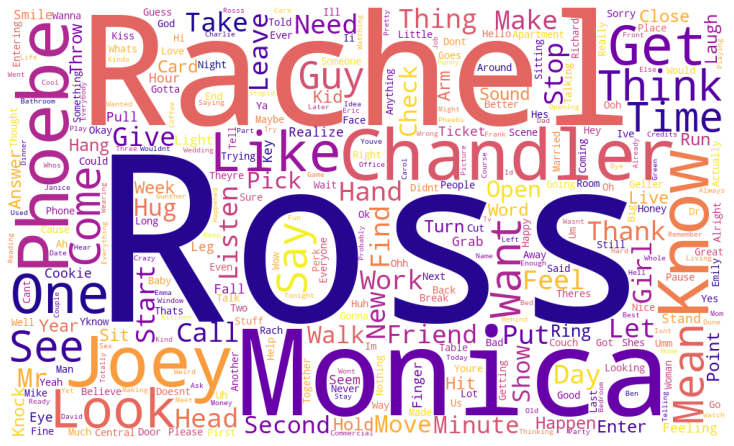

In [190]:
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white', colormap = 'plasma_r',
                stopwords = stopword, max_words = 900,
                min_font_size = 9).generate(' '.join(words_list))
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Recreating the WordCloud image in the shape of the famous FRIENDS doorframe :

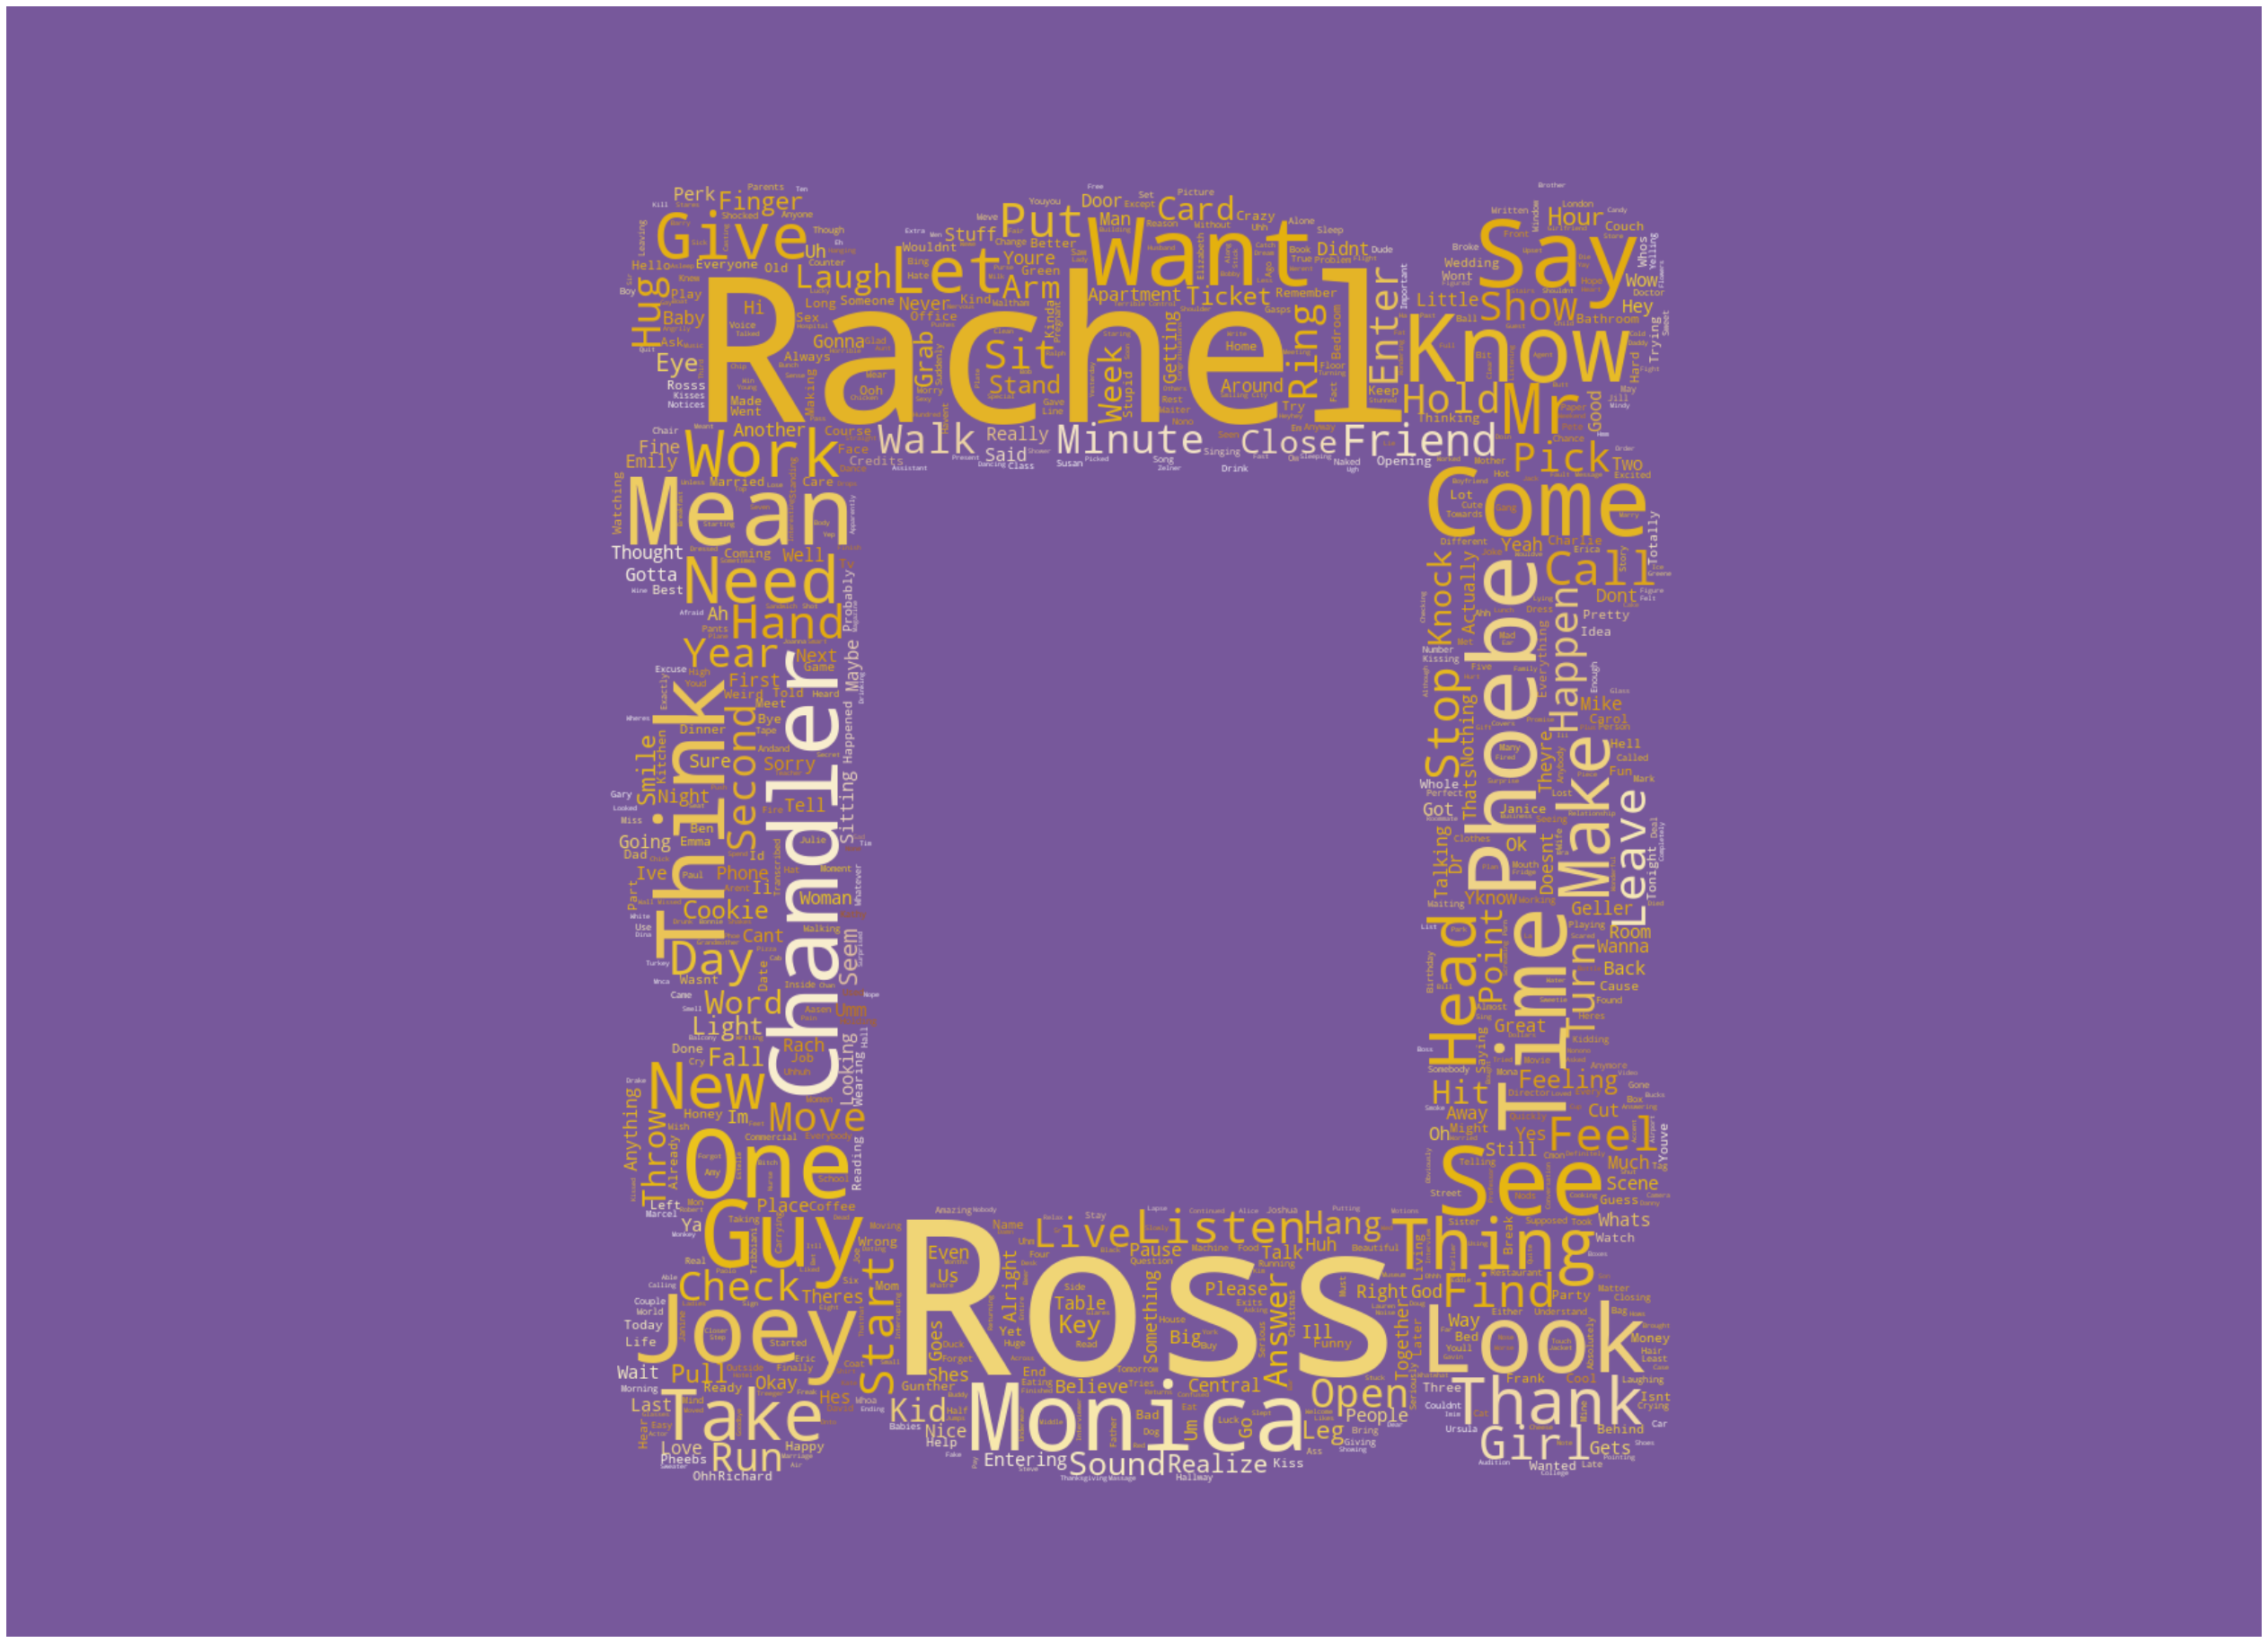

In [184]:
# get the working directory 
from os import path, getcwd
cwd = getcwd()

# numpy image file of mask image 
frame = np.array(Image.open(path.join(cwd, "the_friends_door_frame.png")))

# create the WordCloud image with the frame shape
wc = WordCloud(background_color="#77589b", max_words=1000, max_font_size=400, 
              random_state=1, mask=frame, stopwords=STOPWORDS)
wc.generate(' '.join(words_list))

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[45,60])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()